In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Data

In [ ]:
df = pd.read_csv('Lab3_data_mod2.csv')
df

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19.0,15000.0,39
1,2,Male,21.0,15000.0,81
2,3,Female,20.0,16000.0,6
3,4,Female,23.0,16000.0,77
4,5,Female,31.0,17000.0,40
...,...,...,...,...,...
195,196,Female,35.0,120000.0,79
196,197,Female,45.0,126000.0,28
197,198,Male,32.0,126000.0,74
198,199,Male,32.0,137000.0,18


Data Exploration and Visualisation

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'Spending Score'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    int64  
 1   Gender          200 non-null    object 
 2   Age             197 non-null    float64
 3   Income          197 non-null    float64
 4   Spending Score  200 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


Gender Plot

<Axes: xlabel='Gender'>

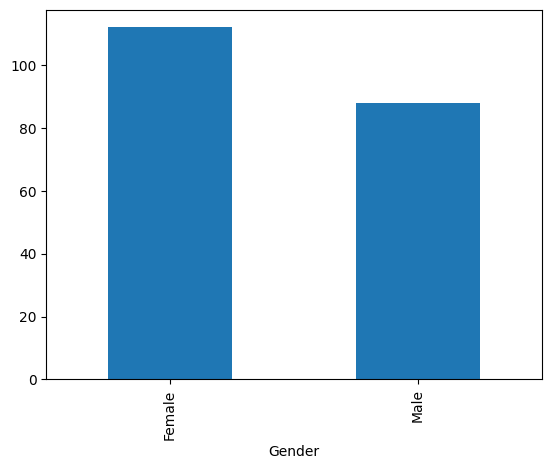

In [ ]:
df.groupby('Gender').size().plot(kind='bar')

Age Plot

Text(0.5, 1.0, 'AGE')

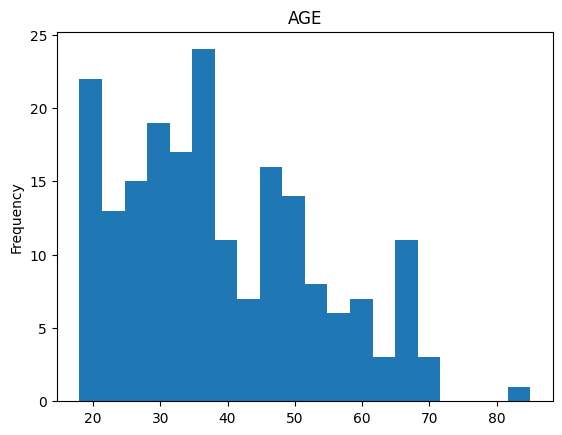

In [ ]:
df['Age'].plot(kind='hist', bins=20)

plt.title('AGE')

Income Plot

Text(0.5, 1.0, 'Income')

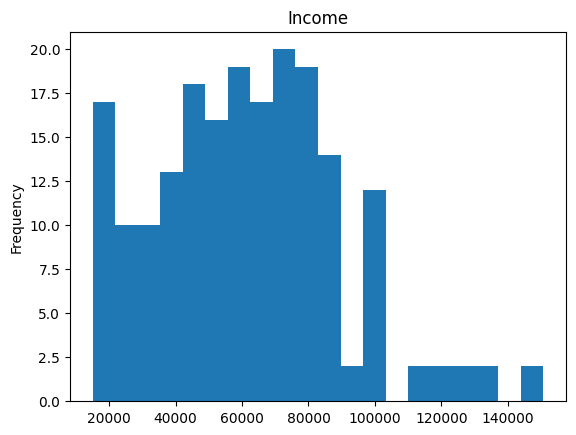

In [ ]:
df['Income'].plot(kind='hist', bins=20)

plt.title('Income')

Spending Score Plot

Text(0.5, 1.0, 'Spending Score')

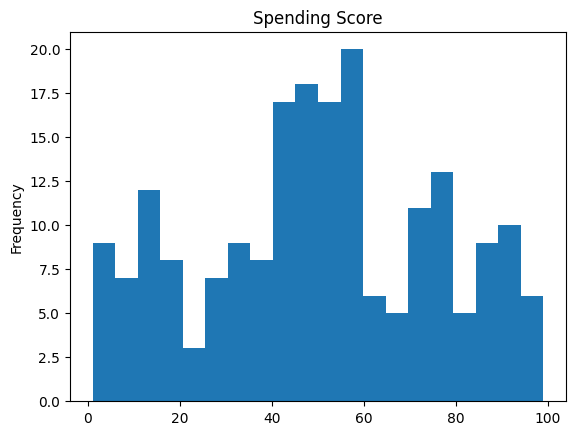

In [ ]:
df['Spending Score'].plot(kind='hist', bins=20)

plt.title('Spending Score')

Pairplot to visualize distribution of data with respect to the other features

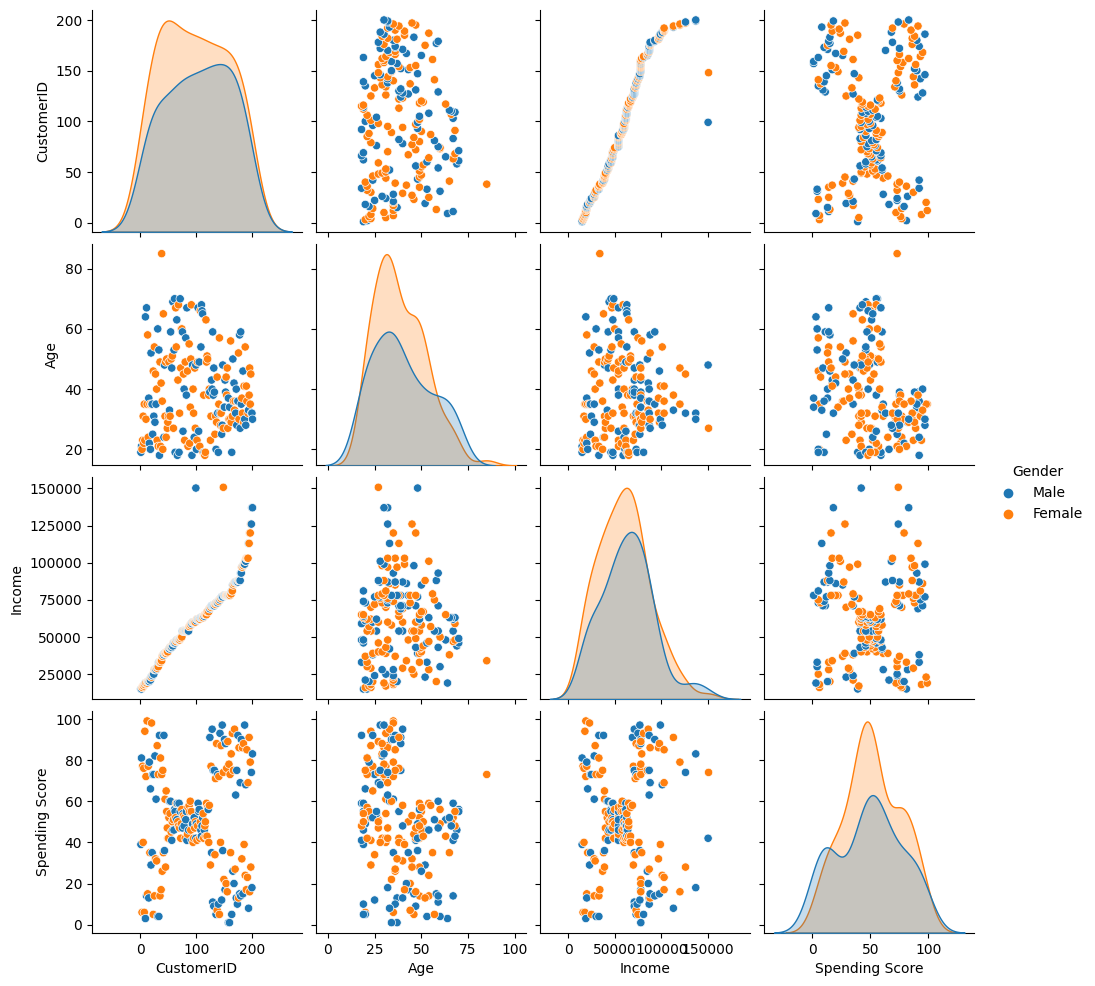

In [ ]:
sns.pairplot(df, hue="Gender")

Filling missing values

In [ ]:
df['Income']=df['Income'].interpolate()
y = df["Age"].median()
df["Age"].fillna(y, inplace = True)
df

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19.0,15000.0,39
1,2,Male,21.0,15000.0,81
2,3,Female,20.0,16000.0,6
3,4,Female,23.0,16000.0,77
4,5,Female,31.0,17000.0,40
...,...,...,...,...,...
195,196,Female,35.0,120000.0,79
196,197,Female,45.0,126000.0,28
197,198,Male,32.0,126000.0,74
198,199,Male,32.0,137000.0,18


In [ ]:
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    int64  
 1   Gender          200 non-null    object 
 2   Age             200 non-null    float64
 3   Income          200 non-null    float64
 4   Spending Score  200 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


Finding Outliers

In [ ]:
df_normal=(df-df.mean())/df.std()
quart1=df_normal.quantile(0.25)
quart3=df_normal.quantile(0.75)
IQR=quart3-quart1
lower=quart1-1.5*IQR
upper=quart3+1.5*IQR


<ipython-input-176-dca7091be136>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_normal=(df-df.mean())/df.std()
<ipython-input-176-dca7091be136>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_normal=(df-df.mean())/df.std()
<ipython-input-176-dca7091be136>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quart1=df_normal.quantile(0.25)
<ipython-input

In [ ]:
x=(df_normal<lower)
y=(df_normal>upper)

<ipython-input-177-389e19404377>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  x=(df_normal<lower)
<ipython-input-177-389e19404377>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  y=(df_normal>upper)


In [ ]:
outliers=(x|y)
no_of_outliers=(x|y).sum().sum()
print("No.of outliers :",no_of_outliers)

No.of outliers : 5


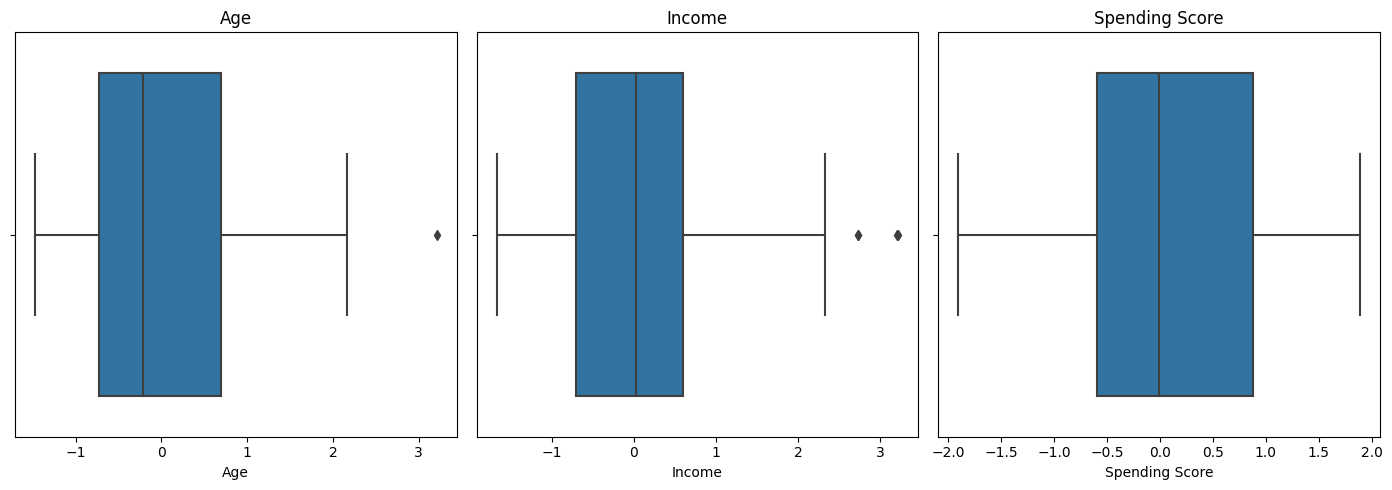

In [ ]:
fig, axes = plt.subplots(1, 3,figsize=(14,5))

sns.boxplot(x=df_normal['Age'], ax=axes[0])
sns.boxplot(x=df_normal['Income'], ax=axes[1])
sns.boxplot(x=df_normal['Spending Score'], ax=axes[2])

axes[0].set_title('Age')
axes[1].set_title('Income')
axes[2].set_title('Spending Score')

plt.tight_layout()
plt.show()

In [ ]:
new_df=df[~outliers]

new_df

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19.0,15000.0,39
1,2,Male,21.0,15000.0,81
2,3,Female,20.0,16000.0,6
3,4,Female,23.0,16000.0,77
4,5,Female,31.0,17000.0,40
...,...,...,...,...,...
195,196,Female,35.0,120000.0,79
196,197,Female,45.0,126000.0,28
197,198,Male,32.0,126000.0,74
198,199,Male,32.0,NaN,18


Removing Outliers

In [ ]:
new_df.dropna(thresh=5,inplace=True)


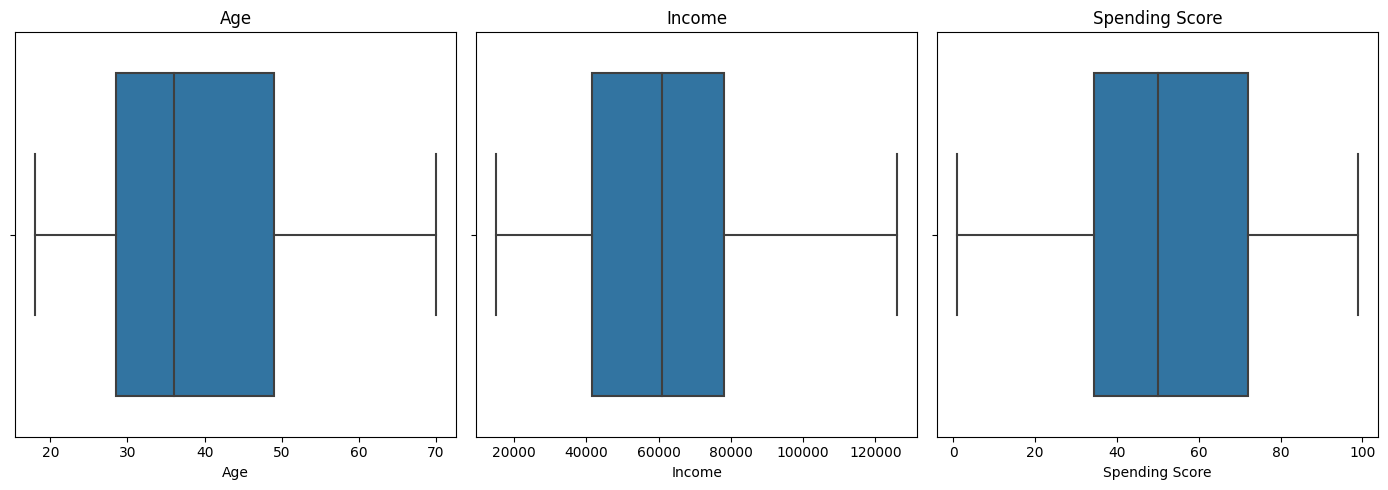

In [ ]:
fig, axes = plt.subplots(1, 3,figsize=(14,5))

sns.boxplot(x=new_df['Age'], ax=axes[0])
sns.boxplot(x=new_df['Income'], ax=axes[1])
sns.boxplot(x=new_df['Spending Score'], ax=axes[2])

axes[0].set_title('Age')
axes[1].set_title('Income')
axes[2].set_title('Spending Score')

plt.tight_layout()
plt.show()

Encoding(One Hot)

In [ ]:
new_df['Income']=new_df['Income']//1000
new_df

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19.0,15.0,39
1,2,Male,21.0,15.0,81
2,3,Female,20.0,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40
...,...,...,...,...,...
193,194,Female,38.0,113.0,91
194,195,Female,47.0,120.0,16
195,196,Female,35.0,120.0,79
196,197,Female,45.0,126.0,28


In [ ]:
new_df = pd.get_dummies(new_df, columns=['Gender'])
new_df

,CustomerID,Age,Income,Spending Score,Gender_Female,Gender_Male
0,1,19.0,15.0,39,0,1
1,2,21.0,15.0,81,0,1
2,3,20.0,16.0,6,1,0
3,4,23.0,16.0,77,1,0
4,5,31.0,17.0,40,1,0
...,...,...,...,...,...,...
193,194,38.0,113.0,91,1,0
194,195,47.0,120.0,16,1,0
195,196,35.0,120.0,79,1,0
196,197,45.0,126.0,28,1,0


DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss

Finding Silhouette Scores and Clustering

In [ ]:
X=new_df[['Income','Age','Spending Score','Gender_Female','Gender_Male']]

ss_={'eps':[],'min_value':[],'ss':[]}
for eps in range(8,14):
  for min_value in range(3,10):
    db = DBSCAN(eps=eps, min_samples=min_value).fit(X)
    labels = db.labels_

    sil_score = ss(X, labels)

    ss_['eps'].append(eps)
    ss_['min_value'].append(min_value)
    ss_['ss'].append(sil_score)

In [ ]:
ss_df = pd.DataFrame(ss_)
ss_df.head()

,eps,min_value,ss
0,8,3,0.029151
1,8,4,-0.022733
2,8,5,-0.016430
3,8,6,-0.047921
4,8,7,-0.162110


Heatmap

<ipython-input-188-96e46c527a23>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  hm_data=ss_df.pivot('eps', 'min_value','ss')


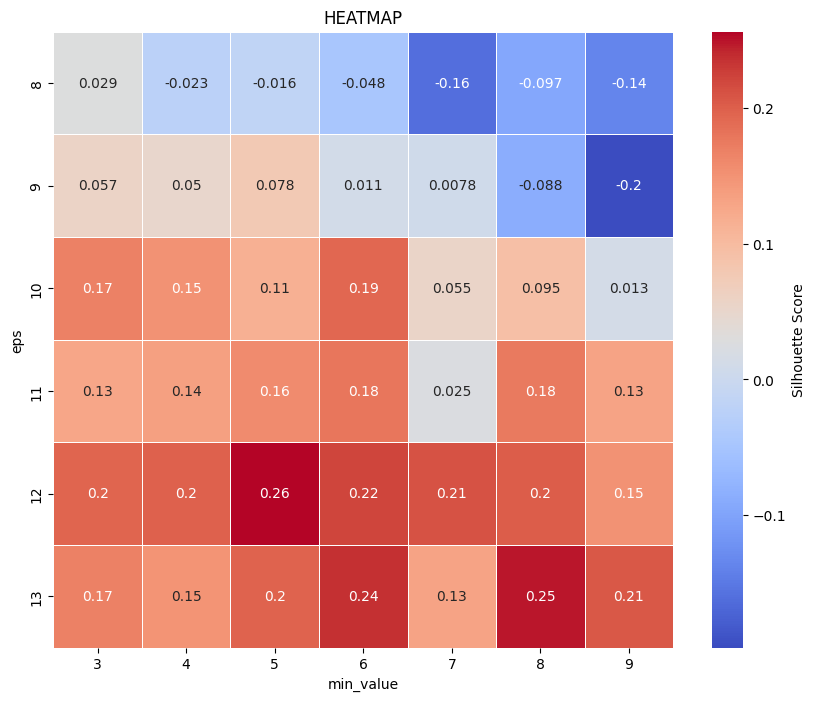

In [ ]:
clmns=['eps','min_value','ss']
hm_data=ss_df.pivot('eps', 'min_value','ss')

plt.figure(figsize=(10, 8))
sns.heatmap(data=hm_data,cmap='coolwarm',annot=True,  linewidths=.5,cbar_kws={'label':'Silhouette Score'})
plt.title('HEATMAP')
plt.show()

In [ ]:
 db_new = DBSCAN(eps=12, min_samples=5).fit(X)
 X['clusters'] = db_new.labels_

CLUSTER BY 2D

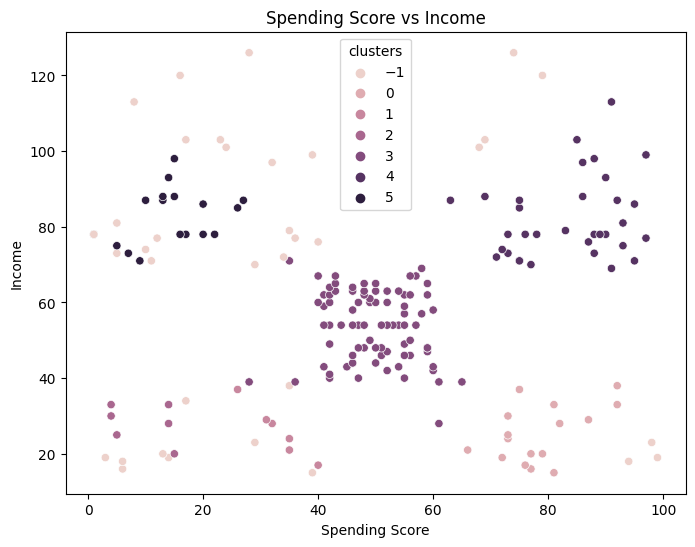

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X['Spending Score'], y=X['Income'],hue = 'clusters',  data=X)
plt.title('Spending Score vs Income')
plt.show()

CLUSTER BY 3D

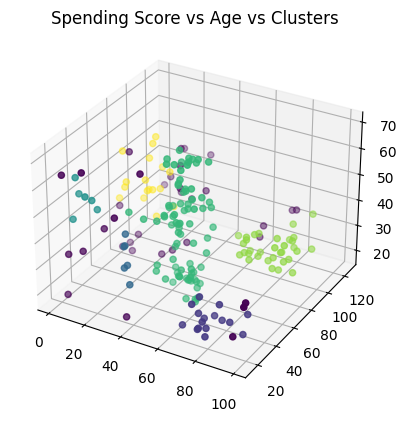

In [ ]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter(X['Spending Score'], X['Income'], X['Age'], c = X['clusters'])
ax.set_title('Spending Score vs Age vs Clusters')
plt.show()